LOF (n_neighbors=10): AUC = 0.5968
LOF (n_neighbors=20): AUC = 0.5471
LOF (n_neighbors=30): AUC = 0.5668
Isolation Forest (contamination=0.05): AUC = 0.9301
Isolation Forest (contamination=0.1): AUC = 0.9301
Isolation Forest (contamination=0.15): AUC = 0.9301
One-Class SVM (nu=0.05): AUC = 0.8705
One-Class SVM (nu=0.1): AUC = 0.8739
One-Class SVM (nu=0.15): AUC = 0.8790


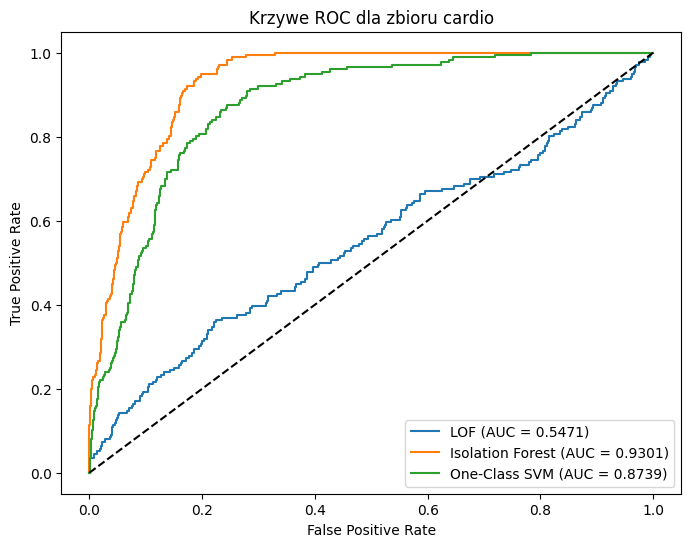

In [1]:
# Importowanie bibliotek
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Wczytanie danych
data = loadmat('datasets/cardio.mat')
X = data['X']  # Cechy
y = data['y'].flatten()  # Etykiety (0 - normalne, 1 - anomalie)

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Funkcja do obliczania ROC i AUC
def evaluate_method(y_true, y_scores, method_name, param_name, param_value):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    print(f"{method_name} ({param_name}={param_value}): AUC = {roc_auc:.4f}")
    return fpr, tpr, roc_auc

# LOF - strojenie n_neighbors
n_neighbors_list = [10, 20, 30]
lof_results = []
for n in n_neighbors_list:
    lof = LocalOutlierFactor(n_neighbors=n)
    lof.fit(X_scaled)  # Fit the model
    y_scores = -lof.negative_outlier_factor_  # Higher values = more anomalous
    fpr, tpr, roc_auc = evaluate_method(y, y_scores, "LOF", "n_neighbors", n)
    lof_results.append((fpr, tpr, roc_auc))

# Isolation Forest - strojenie contamination
contamination_list = [0.05, 0.1, 0.15]
iso_results = []
for c in contamination_list:
    iso = IsolationForest(contamination=c, random_state=42)
    iso.fit(X_scaled)
    y_scores = -iso.decision_function(X_scaled)
    fpr, tpr, roc_auc = evaluate_method(y, y_scores, "Isolation Forest", "contamination", c)
    iso_results.append((fpr, tpr, roc_auc))

# One-Class SVM - strojenie nu
nu_list = [0.05, 0.1, 0.15]
svm_results = []
for nu in nu_list:
    svm = OneClassSVM(nu=nu, kernel='rbf')
    svm.fit(X_scaled)
    y_scores = -svm.decision_function(X_scaled)
    fpr, tpr, roc_auc = evaluate_method(y, y_scores, "One-Class SVM", "nu", nu)
    svm_results.append((fpr, tpr, roc_auc))

# Wizualizacja krzywych ROC dla najlepszych parametrów
plt.figure(figsize=(8, 6))
plt.plot(lof_results[1][0], lof_results[1][1], label=f'LOF (AUC = {lof_results[1][2]:.4f})')
plt.plot(iso_results[1][0], iso_results[1][1], label=f'Isolation Forest (AUC = {iso_results[1][2]:.4f})')
plt.plot(svm_results[1][0], svm_results[1][1], label=f'One-Class SVM (AUC = {svm_results[1][2]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC dla zbioru cardio')
plt.legend()
plt.show()